In [1]:
conda install tensorflow=2.0 python=3.7

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Anaconda3

  added / updated specs:
    - python=3.7
    - tensorflow=2.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _tflow_select-2.3.0        |              mkl           3 KB
    absl-py-0.9.0              |           py37_0         168 KB
    astor-0.8.0                |           py37_0          47 KB
    blinker-1.4                |           py37_0          22 KB
    cachetools-3.1.1           |             py_0          14 KB
    conda-4.8.3                |           py37_0         2.8 MB
    gast-0.2.2                 |           py37_0         155 KB
    google-auth-1.13.1         |             py_0          57 KB
    google-auth-oauthlib-0.4.1 |             py_2          20 KB
    goog

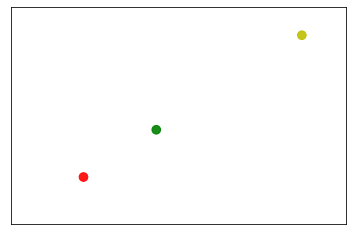

[5, 10, 20] [5, 10, 20] [-0.24754755]


In [91]:
import numpy as np
import matplotlib.pyplot as plt

n = 1
X = np.random.normal(0, 1, n)
Y = np.random.normal(0, 1, n)
T = np.arctan2(Y, X)

X = [5,10,20]
Y = [5,10,20]
C = ['r','g','y']

#plt.axes([0.025, 0.025, 0.95, 0.95])
plt.scatter(X, Y, s=75, c=C, alpha=.9)

plt.xlim(0, 23)
plt.xticks([])
plt.ylim(0, 23)
plt.yticks([])

plt.show()
print(X,Y,T)

In [1]:
import random
from typing import List
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0-preview is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
#np.random.seed(42)
#tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# To get smooth animations
import matplotlib.animation as animation
mpl.rc('animation', html='jshtml')

from IPython.display import clear_output, display
from time import sleep

class Person:
    def __init__(self):
        self.work_loc = 0
        self.home_loc = 0
        self.store_loc = 0
        self.has_virus_num_steps = 0
        self.age = 0
        self.is_dead = 0
        self.is_contagious = 0
        self.degree_of_synonyms = 0
        self.day_of_week_go_shopping = 0
        self.does_follow_lockdown = 0
        self.went_to_store = 0
        self.will_go_to_hospital = 0
        
class Environment:
       
    def __init__(self):
        self.reset()
        
    def reset(self) -> List[float]:
        self.current_steps = 0
        self.current_day = 0
        self.people = []
        self.people_current_location = {}
        self.hospital_loc = 400    
        
        self.num_people_infected = []
        self.num_people_died = []
        self.num_people_recovered = []
        
        self.total_num_people_infected = []
        self.total_num_people_died = []
        self.total_num_people_recovered = []
        
        for i in range(441):
            self.people_current_location[i] = []
                
        for i in range(1200):
        #for i in range(300):
            person = Person()
            person.home_loc = random.randint(0,399)
            person.work_loc = random.randint(400,440)
            person.store_loc = random.randint(436,440)
            person.age = random.randint(0,100)
            person.day_of_week_go_shopping = random.randint(1, 7)
            person.does_follow_lockdown = random.randint(0,10)
            person.will_go_to_hospital = random.randint(0,10)
            
            self.people.append(person)
                    
            starting_loc = random.randint(0,10) 
            
            if starting_loc < 8:
                self.people_current_location[person.home_loc].append(person)
            elif starting_loc < 9:
                self.people_current_location[person.work_loc].append(person)
            else:
                person.went_to_store = 1
                self.people_current_location[person.store_loc].append(person)
                
        
        for i in range(12):
            self.people[i].has_virus_num_steps = 1
            self.people[i].is_contagious = 1
            self.people[i].degree_of_synonyms = random.randint(1,10)
        
        self.num_people_infected.append(12)
        self.total_num_people_infected.append(12)
        self.num_people_died.append(0)
        self.total_num_people_died.append(0)
        self.num_people_recovered.append(0)
        self.total_num_people_recovered.append(0)
        
        return self.get_observation()
                
    def get_observation(self):
        observations = []
        
        for person in self.people:
            #observations.append(person.work_loc)
            #observations.append(person.home_loc)
            #observations.append(person.store_loc)
            observations.append(person.has_virus_num_steps)
            #observations.append(person.age)
            observations.append(person.is_dead)
            observations.append(person.is_contagious)
            observations.append(person.degree_of_synonyms)
            #observations.append(person.day_of_week_go_shopping)
            observations.append(person.does_follow_lockdown)
            #observations.append(person.went_to_store)
            observations.append(person.will_go_to_hospital)
                
        return np.array(observations)

    def get_actions(self) -> List[int]:
        return [0, 1]

    def is_done(self) -> bool:
        return self.current_steps > 10000

    def step(self, action: int, iteration: int) -> float:
        
        self.current_steps += 1
        
        self.current_day = int(self.current_steps / 3) + 1
        
        if self.is_done():
            raise Exception("Game is over")
                
        self.move_people(action)
                
        reward = 0                
        
        for person in self.people:
            if person.is_dead == 1:
                reward -= 25
            elif person.is_contagious == 1:
                reward -= 5
        
        obs = self.get_observation()
        done = self.is_done()
        info = {}
        
        clear_output(wait=True)
        #print(f)  # use display(f)
        #print(self.people_current_location)
        print("action",action,"iteration",iteration,"Steps",self.current_steps, "infected",self.num_people_infected[-1], \
              "died",self.num_people_died[-1] \
              ,"recovered",self.num_people_recovered[-1], \
              "total infected",self.total_num_people_infected[-1],"total died",self.total_num_people_died[-1] \
              ,"total recovered",self.total_num_people_recovered[-1], "reward", reward)
        
        X = []
        Y = []
        C = []
        
        for current_loc in self.people_current_location.keys():
            for i in range(len(self.people_current_location[current_loc])):
                X.append(int((current_loc)/21)+1)
                Y.append(int((current_loc)%21)+1)
                if self.people_current_location[current_loc][i].has_virus_num_steps == 0:
                    C.append('g')
                elif self.people_current_location[current_loc][i].is_contagious == 1:
                    C.append('r')
                else:
                    C.append('y')
                    
        plt.scatter(X, Y, s=75, c=C, alpha=1)

        plt.xlim(0, 22)
        plt.xticks([])
        plt.ylim(0, 22)
        plt.yticks([])

        plt.show()

        #sleep(2)
        
        return obs, reward, done, info

    def move_people(self, action):
        
        num_people_infected = 0
        num_people_died = 0
        num_people_recovered = 0
        
        people_current_location = {}
        for i in range(441):
            people_current_location[i] = []

        for current_loc in self.people_current_location.keys():
            for i in range(len(self.people_current_location[current_loc])):
                person = self.people_current_location[current_loc][i]
                                
                if person.has_virus_num_steps > 0:
                    person.has_virus_num_steps += 1
                
                if person.has_virus_num_steps > 42 and person.degree_of_synonyms > 8:
                    num_people_died += 1
                    person.is_dead = 1
                    continue
                elif person.has_virus_num_steps > 42 and person.is_contagious == 1:
                    num_people_recovered += 1
                    person.is_contagious = 0
                elif person.has_virus_num_steps > 15 and person.degree_of_synonyms > 6 and \
                    person.will_go_to_hospital > 4:
                    people_current_location[self.hospital_loc].append(person)
                    continue
                    
                if action == 1 and person.does_follow_lockdown < 8 and \
                    (self.current_day % person.day_of_week_go_shopping) == 0 and \
                    person.went_to_store == 0:
                    person.went_to_store = 1
                    people_current_location[person.store_loc].append(person)
                elif action == 1 and person.does_follow_lockdown < 8 and \
                    (self.current_day % person.day_of_week_go_shopping) == 0 and \
                    person.went_to_store == 1:
                    people_current_location[person.home_loc].append(person)
                elif action == 1 and person.does_follow_lockdown < 8 and \
                    (self.current_day % person.day_of_week_go_shopping) != 0:
                    person.went_to_store = 0
                    people_current_location[person.home_loc].append(person)
                else:
                    if self.people_current_location[current_loc][i].home_loc == current_loc:
                        people_current_location[person.work_loc].append(person)
                    elif self.people_current_location[current_loc][i].work_loc == current_loc and \
                        person.day_of_week_go_shopping == self.current_day:
                        people_current_location[person.store_loc].append(person)
                    elif self.people_current_location[current_loc][i].store_loc == current_loc:
                        people_current_location[person.home_loc].append(person)
                    else:
                        people_current_location[person.home_loc].append(person)
                        
        for current_loc in people_current_location.keys():
            if next((x for x in people_current_location[current_loc] if x.is_contagious == 1), None) != None:
                for i in range(len(people_current_location[current_loc])):
                    if people_current_location[current_loc][i].has_virus_num_steps == 0:
                        people_current_location[current_loc][i].has_virus_num_steps = 1
                        people_current_location[current_loc][i].is_contagious = 1
                        people_current_location[current_loc][i].degree_of_synonyms = random.randint(1,10)
                        num_people_infected += 1
                        break
        
        self.people_current_location = people_current_location
        
        self.num_people_infected.append(num_people_infected)
        self.total_num_people_infected.append(num_people_infected+self.total_num_people_infected[-1])
        self.num_people_died.append(num_people_died)
        self.total_num_people_died.append(num_people_died+self.total_num_people_died[-1])
        self.num_people_recovered.append(num_people_recovered)
        self.total_num_people_recovered.append(num_people_recovered+self.total_num_people_recovered[-1])
                        

class Agent:
    def __init__(self):
        self.total_reward = 0.0
        self.n_inputs = 4 # == env.observation_space.shape[0]

        
        
    def step(self, env: Environment):
        current_obs = env.get_observation()
        actions = env.get_actions()
        obs, reward, done, info = env.step(random.choice(actions))
        self.total_reward += reward
        
        print(reward, self.total_reward)

"""
if __name__ == "__main__":
    env = Environment()
    agent = Agent()

    while not env.is_done():
        agent.step(env)

    print("Total reward got: %.4f" % agent.total_reward)
"""



def play_one_step(env, obs, model, loss_fn, iteration):
    with tf.GradientTape() as tape:
        #print(np.newaxis)
        left_proba = model(obs[np.newaxis])
        #print(obs)
        #left_proba = model.predict(obs)
        action = (tf.random.uniform([1, 1]) > left_proba)
        y_target = tf.constant([[1.]]) - tf.cast(action, tf.float32)
        loss = tf.reduce_mean(loss_fn(y_target, left_proba))
    grads = tape.gradient(loss, model.trainable_variables)
    obs, reward, done, info = env.step(int(action[0, 0].numpy()), iteration)
    #obs, reward, done, info = env.step(1, iteration)
    return obs, reward, done, grads

def play_multiple_episodes(env, n_episodes, n_max_steps, model, loss_fn, iteration):
    all_rewards = []
    all_grads = []
    for episode in range(n_episodes):
        current_rewards = []
        current_grads = []
        obs = env.reset()
        for step in range(n_max_steps):
            obs, reward, done, grads = play_one_step(env, obs, model, loss_fn, iteration)
            current_rewards.append(reward)
            current_grads.append(grads)
            if done:
                break
        all_rewards.append(current_rewards)
        all_grads.append(current_grads)
    return all_rewards, all_grads

def discount_rewards(rewards, discount_rate):
    discounted = np.array(rewards)
    #for step in range(len(rewards) - 2, -1, -1):
    #    discounted[step] += discounted[step + 1] * discount_rate
    return discounted

def discount_and_normalize_rewards(all_rewards, discount_rate):
    all_discounted_rewards = [discount_rewards(rewards, discount_rate)
                              for rewards in all_rewards]
    flat_rewards = np.concatenate(all_discounted_rewards)
    reward_mean = flat_rewards.mean()
    reward_std = flat_rewards.std()
    return [(discounted_rewards - reward_mean) / reward_std
            for discounted_rewards in all_discounted_rewards]


n_iterations = 20
n_episodes_per_update = 20
n_max_steps = 60
discount_rate = 1 #0.95

optimizer = keras.optimizers.Adam(lr=0.01)
loss_fn = keras.losses.binary_crossentropy

#np.random.seed(42)
#tf.random.set_seed(42)

env = Environment()
rewards = []


model = keras.models.Sequential([
    keras.layers.Dense(64, activation="elu", input_shape=[len(env.get_observation())]),
    keras.layers.Dense(32, activation="elu"), 
    keras.layers.Dense(16, activation="elu"), 
    keras.layers.Dense(8, activation="elu"), 
    keras.layers.Dense(1, activation="sigmoid"),
])


for iteration in range(n_iterations):
    all_rewards, all_grads = play_multiple_episodes(
        env, n_episodes_per_update, n_max_steps, model, loss_fn, iteration)
    total_rewards = sum(map(sum, all_rewards))                     # Not shown in the book
    #print("Iteration: {}, mean rewards: {:.1f}\n".format(          # Not shown
    #    iteration, total_rewards / n_episodes_per_update), end="") # Not shown
    #sleep(3)
    rewards.append(total_rewards / n_episodes_per_update)
    all_final_rewards = discount_and_normalize_rewards(all_rewards,
                                                       discount_rate)
    all_mean_grads = []
    for var_index in range(len(model.trainable_variables)):
        mean_grads = tf.reduce_mean(
            [final_reward * all_grads[episode_index][step][var_index]
             for episode_index, final_rewards in enumerate(all_final_rewards)
                 for step, final_reward in enumerate(final_rewards)], axis=0)
        all_mean_grads.append(mean_grads)
    optimizer.apply_gradients(zip(all_mean_grads, model.trainable_variables))

plt.figure(figsize=(8, 4))
plt.plot(rewards)
plt.xlabel("Episode", fontsize=14)
plt.ylabel("Sum of rewards", fontsize=14)
#save_fig("dqn_rewards_plot")
plt.show()

action 0 iteration 0 Steps 1 infected 9 died 0 recovered 0 total infected 21 total died 0 total recovered 0 reward -105


KeyboardInterrupt: 